In [75]:
#Load packages neede
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import seaborn as sns 
import pandas as pd
import tarfile,os
from tensorflow.keras.utils import to_categorical
import sys
import glob
from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg

from sklearn import preprocessing
import tensorflow as tf
from skimage.transform import resize
from PIL import Image
import cv2
import csv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization, GlobalMaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras import Input
import numpy as np

from matplotlib import pyplot as plt
import pandas as pd
from skimage.transform import resize


In [83]:


folder = "C:/Users/Gehrm/OneDrive/Desktop/Machine Learning/Extracted_Images/images_training_rev1"
def load_images_from_folder(folder):
    i = 0
    images = []
    for filename in os.listdir(folder):
        img = cv2.resize(cv2.imread(os.path.join(folder,filename)),(64,64))
        if img is not None:
            images.append(img)
            i = i+1
            if i == 25000:
                break
            
    return images
images = load_images_from_folder(folder)
#imdir ='C:/Users/Gehrm/OneDrive/Desktop/Extracted_Images'
#[files.extend(("imdir" + '*.' + e)) for e in ext]

#images = [cv2.resize(cv2.imread(file),(64,64)) for file in files[:100]]
#print(images)

In [84]:
"""
target_pic = "Extracted_Images/images_test_rev1/"
images = []
i=0
for img in os.listdir(target_pic):
    image = os.path.join(target_pic, img)
    img =pd.read_csv(image)
    print(img.shape)
    images.append(img)
    #img has shape of (424,424,3)
    i=i+1
    if i == 100:
        break
"""
    #img is the different image files and image 
    #Here we get the bytes and the image itself of the galaxies
#data=pd.DataFrame(images_bytes,1)

file = "C:/Users/Gehrm/training_solutions_rev1.csv"
new_images = np.array(images) 


df =pd.read_csv(file,usecols = ['Class1.1','Class1.2', 'Class1.3','Class2.1', 'Class2.2',
 'Class3.1','Class3.2','Class4.1','Class4.2','Class5.1','Class5.2','Class5.3','Class5.4',
 'Class6.1','Class6.2','Class7.1','Class7.2', 'Class7.3', 'Class8.1', 'Class8.2', 'Class8.3', 'Class8.4', 'Class8.5',
 'Class8.6', 'Class8.7', 'Class9.1', 'Class9.2', 'Class9.3', 'Class10.1',
 'Class10.2', 'Class10.3', 'Class11.1', 'Class11.2', 'Class11.3', 'Class11.4',
 'Class11.5', 'Class11.6'])
print("shape of new_images:",new_images.shape)
training_size = 19000
test_size = round(training_size/5)
Y_train = df[0:training_size]
Y_train= Y_train.to_numpy()

X_train=new_images[0:training_size,:,:,0] ##Same thing as train_test_split
X_test=new_images[(training_size+1):(training_size+test_size+1),:,:,0]

Y_test = df[training_size+1:training_size+test_size+1]
Y_test = Y_test.to_numpy()

print("shape of X_train: ",X_train.shape)
print("shape of X_test: ",X_test.shape)
print("shape of Y_train: ",Y_train.shape)
print("shape of Y_test: ",Y_test.shape)
X_train_reshaped = X_train.reshape(X_train.shape[0],64,64,1)
X_train_reshaped = X_train_reshaped.astype("float32") / 255
X_test_reshaped = X_test.reshape(X_test.shape[0],64,64,1)
X_test_reshaped = X_test_reshaped.astype("float32") / 255
n_classes = 37
"""
print("Shape before one-hot encoding: ", Y_train.shape)
Y_train = to_categorical(Y_train, n_classes)
Y_test = to_categorical(Y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape,Y_train)
"""
print("first Y_train",Y_train[0])

shape of new_images: (25000, 64, 64, 3)
shape of X_train:  (19000, 64, 64)
shape of X_test:  (3800, 64, 64)
shape of Y_train:  (19000, 37)
shape of Y_test:  (3800, 37)
first Y_train [0.383147   0.616853   0.         0.         0.616853   0.03845215
 0.57840085 0.41839782 0.19845518 0.         0.10475213 0.51210087
 0.         0.054453   0.945547   0.20146252 0.18168448 0.
 0.         0.0272265  0.         0.0272265  0.         0.
 0.         0.         0.         0.         0.27995249 0.13844533
 0.         0.         0.09288557 0.         0.         0.
 0.32551225]


In [104]:

#We use root mean squared as Loss function
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true)))


batch_size = 80


model = Sequential()
model.add(Conv2D(128, (3,3), activation="relu", input_shape=(64, 64,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(128, (3, 3)))
model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(GlobalMaxPooling2D())

model.add(Dropout(0.25))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(37))
model.add(Activation('sigmoid'))


model.compile(loss='binary_crossentropy',
              optimizer='adamax',
              metrics=[root_mean_squared_error])

model.summary()


Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_105 (Conv2D)         (None, 62, 62, 128)       1280      
                                                                 
 max_pooling2d_54 (MaxPoolin  (None, 31, 31, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_106 (Conv2D)         (None, 29, 29, 64)        73792     
                                                                 
 max_pooling2d_55 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_107 (Conv2D)         (None, 12, 12, 128)       73856     
                                                                 
 conv2d_108 (Conv2D)         (None, 10, 10, 128)     

In [105]:

history = model.fit(X_train_reshaped, Y_train, batch_size = 128, epochs = 10, validation_data=(X_test_reshaped,Y_test))
model.save('model_14_04')
print(history.history.keys())


Epoch 1/10
  5/149 [>.............................] - ETA: 2:19 - loss: 0.6816 - root_mean_squared_error: 0.4266

KeyboardInterrupt: 

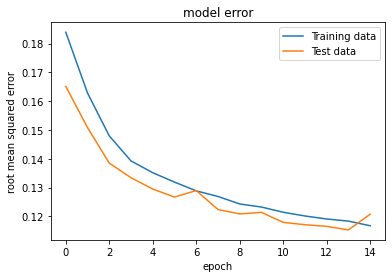

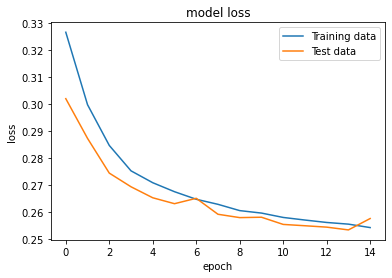

In [101]:
#plot history keys for the model. Both the accuracy with root mean squared error and the losses for each epoch
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title("model error")
plt.ylabel('root mean squared error')
plt.xlabel('epoch')
plt.legend(['Training data', 'Test data'], loc='upper right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training data', 'Test data'], loc='upper right')
plt.show()

(424, 424, 3)
Shape of prediction :  (1, 37)
The prediction of the image:  [[9.9916637e-01 9.9455392e-01 9.9995595e-01 9.1648567e-01 9.5526576e-02
  1.0000000e+00 9.3728274e-02 5.8315289e-01 9.7145581e-01 7.1200097e-01
  3.1474888e-02 9.9999833e-01 5.5163076e-05 6.2553734e-02 1.5172571e-02
  1.5962720e-03 2.0314455e-03 3.3497512e-03 9.4677067e-01 5.7047248e-02
  9.9999726e-01 9.4774365e-04 9.9952424e-01 1.5414469e-05 9.9992573e-01
  6.6091479e-07 6.3154332e-08 2.1528900e-03 9.8475814e-01 9.9999934e-01
  2.3983534e-06 8.5024732e-01 9.9819273e-01 4.6335161e-03 2.3376477e-01
  5.1324368e-03 9.9401014e-08]]


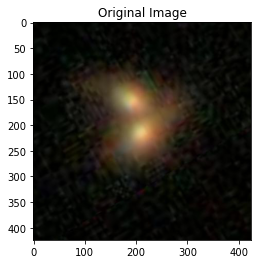

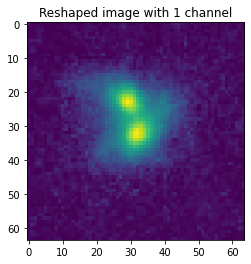

In [102]:
from keras.models import load_model
from keras.preprocessing import image
import random

file_path_type = ["Extracted_Images/images_test_rev1/*.jpg"]
#images = glob.glob(random.choice(file_path_type))
#random_image = random.choice(images)
img = "Extracted_Images/images_training_rev1/393250.jpg"
img = image.load_img(img, target_size=(424,424))
plt.imshow(img)
plt.title("Original Image")

x = image.img_to_array(img)
print(x.shape)
x= x[:,:,0]
x= cv2.resize(x,(64,64))
plt.figure()
plt.imshow(x)
plt.title("Reshaped image with 1 channel")

x = np.expand_dims(x, axis=0)
x= x.reshape(1,64,64,1)
images = np.vstack([x]) #stack array in sequence vertically

classes =model.predict(images)
print("Shape of prediction : ",classes.shape)
print("The prediction of the image: ",classes)